#  <span style="color:black">Binary Classification Tutorial - Level Beginner</span>

**Created using:** PyCaret 3.0.0rc6 <br />
**Date Updated:** January 8, 2023

# Tutorial Objective
Welcome to the Binary Classification Tutorial - Level Beginner. This tutorial assumes that you are new to PyCaret with no prior experience.

In this tutorial you will learn:

* **Install PyCaret:**  How to install PyCaret
* **Introduction:** Introduction to Binary Classification
* **Getting Data:**  How to get sample data from PyCaret dataset repository
* **Setup:**  How to initialize experiment in PyCaret
* **Create Model:**  How to train a model with cross-validation
* **Tune Model:**  How to automatically tune the hyper-parameters of a model
* **Plot Model:**  How to analyze model performance using visualizations
* **Finalize Model:** How to finalize the best model at the end of the experiment
* **Predict Model:**  How to make predictions on new / unseen data
* **Save Model:**  How to save a model for future use
* **Load Model:**  How to load a saved model from file

**Read Time:** Approx. 45 Minutes <br />
**Run Time:** <5 minutes


# Install PyCaret
You can install pycaret using pip. 

`pip install pycaret`  <br />

To install the full version with all dependencies use: <br />

`pip install pycaret[full]`


# You may also be interested in:
- [Binary Classification Tutorial - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)
- [Binary Classification Tutorial - Expert Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Expert%20-%20CLF103.ipynb)

# What is Binary Classification?
Binary classification is a supervised machine learning technique where the goal is to predict categorical class labels which are discrete and unoredered such as Pass/Fail, Positive/Negative, Default/Not-Default etc. A few real world use cases for classification are listed below:

- Medical testing to determine if a patient has a certain disease or not - the classification property is the presence of the disease.
- A "pass or fail" test method or quality control in factories, i.e. deciding if a specification has or has not been met – a go/no-go classification.
- Information retrieval, namely deciding whether a page or an article should be in the result set of a search or not – the classification property is the relevance of the article, or the usefulness to the user.

[Learn More about Binary Classification](https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d)

# Dataset

In this tutorial we will use a dataset from UCI called **Default of Credit Card Clients Dataset**. This dataset contains information on default payments, demographic factors, credit data, payment history, and billing statements of credit card clients in Taiwan from April 2005 to September 2005. There are 24,000 samples and 25 features. Short descriptions of each column are as follows:

- **ID:** ID of each client
- **LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- **SEX:** Gender (1=male, 2=female)
- **EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- **MARRIAGE:** Marital status (1=married, 2=single, 3=others)
- **AGE:** Age in years
- **PAY_1 to PAY_6:** Repayment status by n months ago (PAY_1 = last month ... PAY_6 = 6 months ago) (Labels: -1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- **BILL_AMT1 to BILL_AMT6:** Amount of bill statement by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **PAY_AMT1 to PAY_AMT6:** Amount of payment by n months ago ( BILL_AMT1 = last_month .. BILL_AMT6 = 6 months ago)
- **default:** Default payment (1=yes, 0=no) `Target Column`

# Dataset Acknowledgement:
Lichman, M. (2013). UCI Machine Learning Repository. Irvine, CA: University of California, School of Information and Computer Science.

The original dataset and data dictionary can be [found here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

# Getting the Data

You can use `get_data` function from `datasets` module to load the `credit` dataset. [Source](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [2]:
from pycaret.datasets import get_data
dataset = get_data('credit')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
#check the shape of data
dataset.shape

(24000, 24)

In order to demonstrate the use of the predict function in pycaret, a sample of 5% is withheld from the raw dataset.

In [4]:
# split data into 95% and 5%
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 24)
Unseen Data For Predictions: (1200, 24)


# Initializing Setup

The `setup` function initializes the experiment in PyCaret and creates the transformation pipeline based on all the parameters passed in the function. Setup function must be called before executing any other function. It takes two required parameters: `data` and `target`. All the other parameters are optional.

In [5]:
from pycaret.classification import *

In [6]:
exp_clf101 = setup(data = data, target = 'default', session_id = 123) 

,Description,Value
0,Session id,123
1,Target,default
2,Target type,Binary
3,Original data shape,"(22800, 24)"
4,Transformed data shape,"(22800, 24)"
5,Transformed train set shape,"(15959, 24)"
6,Transformed test set shape,"(6841, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information. 

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary or Multiclass. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features treated as numeric. In this tutorial, all features are treated as numeric. <br/>
<br/>
- **Categorical features :**  The number of features treated as categorical. In this tutorial, there is None. <br/>

# Compare Models

The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with mean cross validation scores.

In [7]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8225,0.7890,0.3759,0.6792,0.4837,0.3871,0.4120,1.3470
lightgbm,Light Gradient Boosting Machine,0.8202,0.7842,0.3816,0.6630,0.4842,0.3848,0.4064,0.2500
ada,Ada Boost Classifier,0.8200,0.7802,0.3476,0.6847,0.4604,0.3660,0.3966,0.3430
rf,Random Forest Classifier,0.8193,0.7748,0.3870,0.6552,0.4864,0.3855,0.4053,0.7570
xgboost,Extreme Gradient Boosting,0.8165,0.7668,0.3861,0.6420,0.4818,0.3787,0.3970,1.1300
lda,Linear Discriminant Analysis,0.8151,0.7212,0.2739,0.7152,0.3958,0.3114,0.3618,0.0390
et,Extra Trees Classifier,0.8130,0.7677,0.3793,0.6277,0.4728,0.3674,0.3847,0.5690
ridge,Ridge Classifier,0.8007,0.0000,0.1558,0.7328,0.2567,0.1943,0.2735,0.0180
dummy,Dummy Classifier,0.7788,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0230
lr,Logistic Regression,0.7786,0.6400,0.0000,0.0000,0.0000,-0.0004,-0.0032,0.9030


In [8]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


# Create Model

The `create_model` function trains and evaluates the performance of a given estimator using cross validation. The output of this function is a scoring grid with CV scores by fold. Available models can be accessed using the `models` function.

In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [10]:
# train a decision tree model
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7356,0.6274,0.4334,0.4080,0.4203,0.2493,0.2495
1,0.7237,0.6158,0.4193,0.3854,0.4016,0.2224,0.2227
2,0.7444,0.6514,0.4816,0.4304,0.4545,0.2883,0.2891
3,0.7199,0.6094,0.4079,0.3770,0.3918,0.2103,0.2106
4,0.7419,0.6233,0.4108,0.4155,0.4131,0.2477,0.2477
5,0.7299,0.6248,0.4363,0.3990,0.4168,0.2415,0.2419
6,0.7174,0.6015,0.3938,0.3697,0.3813,0.1985,0.1986
7,0.7325,0.6213,0.4221,0.4005,0.4110,0.2381,0.2382
8,0.7268,0.6147,0.4136,0.3893,0.4011,0.2244,0.2245


In [11]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [12]:
# train a k nearest neighbor model
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7412,0.5886,0.1671,0.3315,0.2222,0.0868,0.0941
1,0.7350,0.5767,0.1473,0.2989,0.1973,0.0601,0.0655
2,0.7632,0.6671,0.2096,0.4277,0.2814,0.1590,0.1735
3,0.7469,0.5987,0.1530,0.3396,0.2109,0.0853,0.0949
4,0.7538,0.6085,0.1983,0.3889,0.2627,0.1332,0.1441
5,0.7613,0.6211,0.1870,0.4125,0.2573,0.1384,0.1539
6,0.7419,0.5895,0.1671,0.3333,0.2226,0.0879,0.0954
7,0.7594,0.6135,0.1898,0.4061,0.2587,0.1371,0.1513
8,0.7475,0.6091,0.1898,0.3641,0.2495,0.1155,0.1243


In [13]:
# train a random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8227,0.7717,0.4108,0.6591,0.5061,0.4051,0.4219
1,0.8271,0.7726,0.4023,0.6860,0.5071,0.4108,0.4323
2,0.8233,0.8079,0.4108,0.6621,0.5070,0.4065,0.4237
3,0.8120,0.7501,0.3711,0.6268,0.4662,0.3611,0.3794
4,0.8139,0.7623,0.3541,0.6443,0.4570,0.3560,0.3793
5,0.8221,0.7827,0.3909,0.6667,0.4929,0.3937,0.4144
6,0.8120,0.7607,0.3711,0.6268,0.4662,0.3611,0.3794
7,0.8258,0.7959,0.4023,0.6794,0.5053,0.4079,0.4286
8,0.8208,0.7602,0.3739,0.6701,0.4800,0.3821,0.4058


The mean score here matches the performance seen in the output of `compare_models`. This is because the metrics printed in the `compare_models` score grid are the average scores across all CV folds.

# Tune Model

The `tune_model` function automatically tunes the hyperparameters of the model using a pre-defined grid. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in `optimize` parameter. To use the custom search grid, you can pass `custom_grid` parameter. Since the default method is `randomgridsearch` it is not guranteed that performance will always be improved by tuning. If the performance doesn't improve you can try increasing the `n_iter` parameter.

In [14]:
# tune decision tree model
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8264,0.6573,0.3541,0.7184,0.4744,0.3845,0.4191
1,0.8271,0.6527,0.3399,0.7362,0.4651,0.3782,0.4185
2,0.8221,0.6515,0.3456,0.6971,0.4621,0.3697,0.4024
3,0.8170,0.6432,0.3314,0.6763,0.4449,0.3503,0.3823
4,0.8239,0.6486,0.3343,0.7195,0.4565,0.3678,0.4063
5,0.8252,0.6474,0.3286,0.7342,0.4540,0.3675,0.4097
6,0.8189,0.6434,0.3286,0.6905,0.4453,0.3530,0.3878
7,0.8283,0.6494,0.3286,0.7582,0.4585,0.3749,0.4213
8,0.8233,0.6503,0.3399,0.7101,0.4598,0.3695,0.4054


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [15]:
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')


In [16]:
# tune knn model
import numpy as np
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7794,0.6342,0.0595,0.5122,0.1066,0.0635,0.1139
1,0.7826,0.6625,0.0453,0.6154,0.0844,0.0558,0.1222
2,0.7832,0.7012,0.0623,0.5946,0.1128,0.0740,0.1386
3,0.7801,0.6399,0.0510,0.5294,0.0930,0.0563,0.1096
4,0.7794,0.6403,0.0482,0.5152,0.0881,0.0522,0.1029
5,0.7820,0.6773,0.0595,0.5676,0.1077,0.0686,0.1286
6,0.7857,0.6403,0.0567,0.6897,0.1047,0.0736,0.1536
7,0.7788,0.6631,0.0623,0.5000,0.1108,0.0650,0.1131
8,0.7732,0.6275,0.0340,0.3636,0.0622,0.0253,0.0499


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [17]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='uniform')


By default, `tune_model` optimizes `Accuracy` but this can be changed using `optimize` parameter. For example: `tune_model(dt, optimize = 'AUC')` will search for the hyperparameters of a Decision Tree Classifier that results in the highest `AUC`.

In [18]:
# tune random forest model (this may take some time)
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7682,0.7853,0.6317,0.4816,0.5466,0.3946,0.4012
1,0.7638,0.7883,0.6431,0.4749,0.5463,0.3915,0.3997
2,0.7870,0.8120,0.6884,0.5137,0.5884,0.4487,0.4575
3,0.7588,0.7668,0.5864,0.4641,0.5181,0.3602,0.3645
4,0.7801,0.7766,0.5949,0.5024,0.5447,0.4011,0.4036
5,0.7757,0.7910,0.6374,0.4945,0.5569,0.4099,0.4159
6,0.7531,0.7490,0.6006,0.4559,0.5183,0.3565,0.3626
7,0.7726,0.7828,0.6374,0.4891,0.5535,0.4044,0.4108
8,0.7519,0.7568,0.6062,0.4544,0.5194,0.3568,0.3635


Fitting 10 folds for each of 10 candidates, totalling 100 fits


# Plot Model

The `plot_mdoel` function analyzes the performance of a trained model on the test / hold-out set. It may require re-training the model in certain cases. There are 15+ plots available, please see the `plot_model` docstring for the list of available plots.

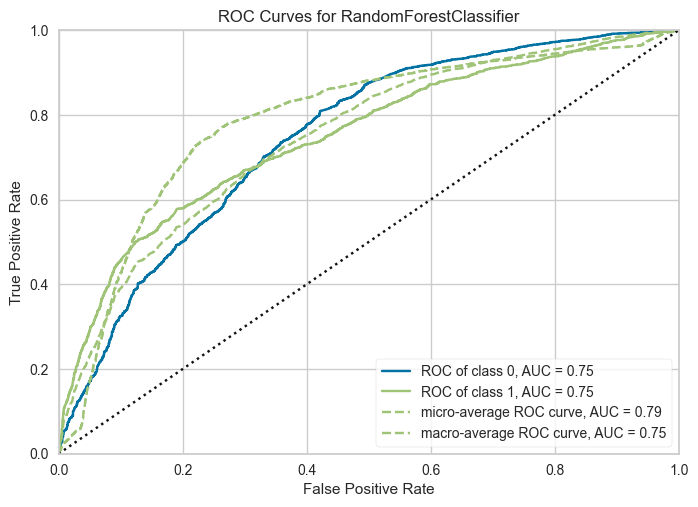

In [19]:
# auc plot
plot_model(tuned_rf, plot = 'auc')

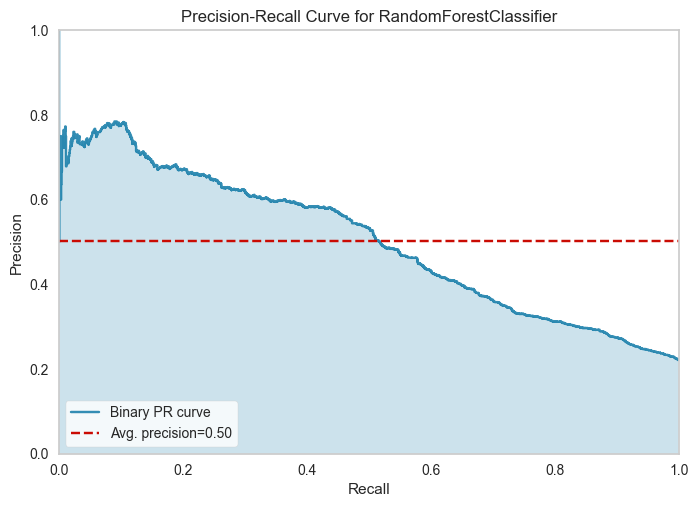

In [20]:
# precision recall curve plot
plot_model(tuned_rf, plot = 'pr')

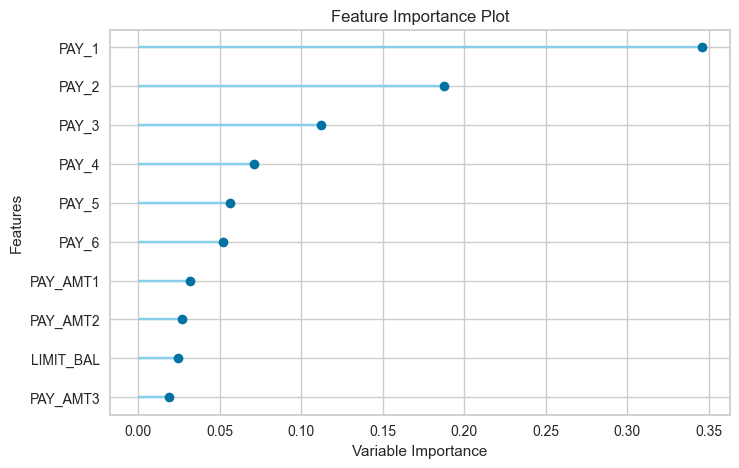

In [21]:
# feature importance plot
plot_model(tuned_rf, plot='feature')

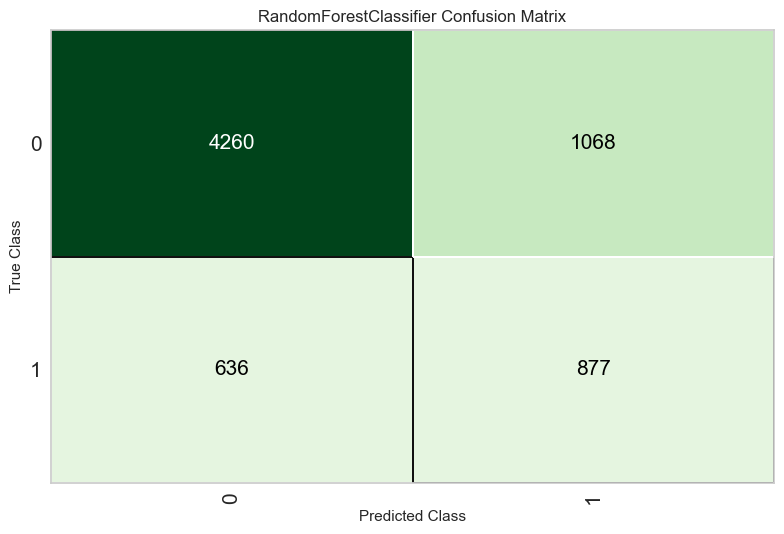

In [22]:
plot_model(tuned_rf, plot = 'confusion_matrix')

Another way to analyze the performance of models is to use the `evaluate_model` function which displays a user interface for all of the available plots for a given model. It is only available when you are using Jupyter compatible notebook environment. 

In [23]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Predict on test / hold-out Sample

The `predict_model` function in pycaret generates the label given a trained model.  When the `data` is None, it generate `prediction_label` and `prediction_score` on the test / hold-out set and also display performance metrics. 

In [24]:
pred_holdout = predict_model(tuned_rf)
pred_holdout.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7509,0.7483,0.5796,0.4509,0.5072,0.3440,0.3489


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,prediction_label,prediction_score
15959,30000.0,1.0,1.0,1.0,38.0,8.0,7.0,6.0,5.0,4.0,...,31085.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.8522
15960,110000.0,1.0,3.0,1.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,31073.0,390.0,5050.0,63032.0,1100.0,1100.0,1000.0,0,0,0.6116
15961,290000.0,2.0,1.0,2.0,27.0,2.0,0.0,0.0,0.0,2.0,...,278260.0,16500.0,15000.0,20000.0,10000.0,9701.0,0.0,0,1,0.7464
15962,110000.0,2.0,3.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,...,63208.0,4000.0,5000.0,3000.0,3000.0,3000.0,8954.0,0,0,0.7321
15963,360000.0,1.0,3.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,235916.0,15000.0,9221.0,9225.0,8112.0,8369.0,9000.0,0,0,0.6824


# Finalize Model

The `finalize_model` function fits the entire pipeline  onto the complete dataset including the test/hold-out sample (30% in this tutorial). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [25]:
final_rf = finalize_model(tuned_rf)

In [26]:
print(final_rf)

Pipeline(memory=Memory(location=C:\Users\owner\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                             'MARRIAGE', 'AGE', 'PAY_1',
                                             'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                             'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                             'BILL_AMT3', 'BILL_AMT4',
                                             'BILL_AMT5', 'BILL_AMT6',
                                             'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                             'PAY_AM...
                 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                        class_weight='balanced_subsample',
                                        criterion='gini', max_depth=6,
                            

# Predict on unseen data

The `predict_model` function is also used to predict on the unseen dataset.

In [27]:
# 5% sample witheld in the beginning
data_unseen.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,100000,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
1,380000,1,2,2,32,-1,-1,-1,-1,-1,...,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0
2,200000,2,2,1,32,-1,-1,-1,-1,2,...,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0
3,200000,1,1,1,53,2,2,2,2,2,...,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1
4,240000,1,1,2,41,1,-1,-1,0,0,...,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0


In [28]:
# drop the default column from data_unseen
data_unseen.drop('default', axis = 1, inplace = True)

In [29]:
pred_unseen = predict_model(final_rf, data=data_unseen)
pred_unseen.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prediction_label,prediction_score
0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0.5623
1,380000.0,1.0,2.0,2.0,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0.7345
2,200000.0,2.0,2.0,1.0,32.0,-1.0,-1.0,-1.0,-1.0,2.0,...,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0.5606
3,200000.0,1.0,1.0,1.0,53.0,2.0,2.0,2.0,2.0,2.0,...,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0.8407
4,240000.0,1.0,1.0,2.0,41.0,1.0,-1.0,-1.0,0.0,0.0,...,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,1,0.5078


The `prediction_label` and `prediction_score` columns are added to the input dataset. `prediction_label` is the hard prediction and `prediction_score` is the probability of the **predicted class**.

# Save Model

The `save_model` function is used to save the pipeline (including model) on the disk as a `pkl` file.

In [30]:
save_model(final_rf,'rf_final_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\owner\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['LIMIT_BAL', 'SEX', 'EDUCATION',
                                              'MARRIAGE', 'AGE', 'PAY_1',
                                              'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                              'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                                              'BILL_AMT3', 'BILL_AMT4',
                                              'BILL_AMT5', 'BILL_AMT6',
                                              'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                                              'PAY_AM...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=6,
              

# Load Model

The `load_model` function reads the pipeline `pkl` file from the disk.

In [31]:
rf_pipeline_from_disk = load_model('rf_final_pipeline')

Transformation Pipeline and Model Successfully Loaded


In [32]:
new_prediction = predict_model(rf_pipeline_from_disk, data=data_unseen)
new_prediction.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,prediction_label,prediction_score
0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0.5623
1,380000.0,1.0,2.0,2.0,32.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0.7345
2,200000.0,2.0,2.0,1.0,32.0,-1.0,-1.0,-1.0,-1.0,2.0,...,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0.5606
3,200000.0,1.0,1.0,1.0,53.0,2.0,2.0,2.0,2.0,2.0,...,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0.8407
4,240000.0,1.0,1.0,2.0,41.0,1.0,-1.0,-1.0,0.0,0.0,...,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,1,0.5078


Notice that the results of `unseen_predictions` and `new_prediction` are identical.

# Wrap-up / Next Steps?

This tutorial has covered the entire machine learning pipeline from data ingestion, pre-processing, training the model, hyperparameter tuning, prediction and saving the model for later use. We have completed all of these steps in less than 10 commands which are naturally constructed and very intuitive to remember such as `create_model`, `tune_model`, `compare_models`. Re-creating the entire experiment without PyCaret would have taken well over 100 lines of code without pycaret.

We have only covered the basics of `pycaret.classification`. In following tutorials we will go deeper into advanced pre-processing, ensembling, generalized stacking and other techniques that allow you to fully customize your machine learning pipeline and are must know for any data scientist.

See you at the next tutorial. Follow the link to [Binary Classification Tutorial (CLF102) - Intermediate Level](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)